#### 변동계수의 필요성

In [5]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = x1 * 10

print(np.std(x1, ddof = 1))
print(np.std(x2, ddof = 1))

1.5811388300841898
15.811388300841896


In [6]:
print(variation(x1))# 변동 계수
print(variation(x2))

0.47140452079103173
0.4714045207910317


In [7]:
print(np.std(x1,ddof = 1) / np.mean(x1))
print(np.std(x2, ddof = 1) / np.mean(x2))

0.5270462766947299
0.5270462766947299


In [8]:
z1 = (x1 - x1.mean()) / x1.std()
z2 = (x2 - x2.mean()) / x2.std()

print(z1)
print(z2)

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [9]:
# sklearn을 이용한 스케일링
X = pd.DataFrame({"X1":[1, 2, 3, 4, 5],
    "X2": [10, 20, 30, 40, 50]})

X

,X1,X2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Z = scaler.fit_transform(X) # fit_transform => ndarray
pd.DataFrame(Z)

,0,1
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [12]:
x = np.random.normal(100, 20, size = 1000)
x

array([103.93625584, 135.6615789 , 120.68706552, 139.34069571,
        78.83647238, 107.9974661 , 103.65753913, 113.32613786,
        83.29372234,  96.02736989, 101.79881051, 107.72900369,
        98.28011564,  99.38442094, 113.0689679 , 107.41631433,
       110.03580247, 108.63543195, 143.90829467,  87.32080576,
       101.94320733, 103.01372104, 103.73005522, 112.28681943,
       105.00519933,  98.3736608 ,  90.29108663,  89.3791114 ,
       112.43307271, 112.77711933,  82.20228468, 117.4503611 ,
       109.25148147,  69.30962231,  94.79389334, 108.23929774,
       112.22556706, 128.17845962,  83.61321706, 101.64138088,
       116.62589884, 114.95359959,  82.20656082,  95.52910259,
        74.50139019, 105.49661691,  80.53325149, 110.3037564 ,
        93.45963308, 109.15433146, 140.76290052, 127.95715613,
        71.16911407, 108.22146811,  69.8120612 , 113.78276439,
       116.48727147,  98.06424659, 107.49797439, 100.56200667,
       120.36756977,  87.08204196, 104.52989169,  96.01

In [13]:
print(np.ptp(x))
print(np.max(x) - np.min(x))

125.99647917102816
125.99647917102816


In [14]:
print(np.quantile(x, 0.75) - np.quantile(x, 0.25))
print(iqr(x))

25.69175031971082
25.69175031971082


#### 백분위수 및 사분위수 계산

In [15]:
x = np.arange(1, 12 , 1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [16]:
print(np.percentile(x, 10))
print(np.quantile(x, 0.1))

2.0
2.0


In [17]:
print(np.percentile(x,25))
print(np.quantile(x,0.25))

3.5
3.5


#### 왜도 계산

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

In [19]:
pd.Series(x1).value_counts(sort = False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

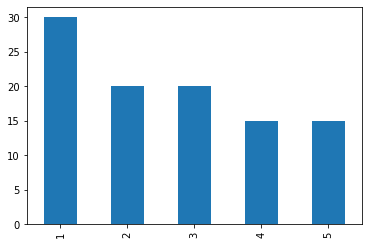

In [20]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

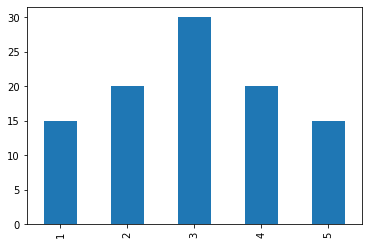

In [21]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

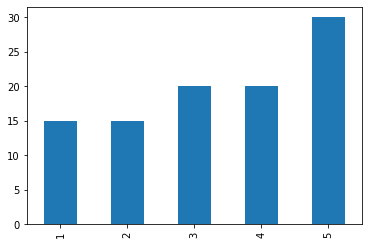

In [22]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [24]:
print("좌로 치우쳤을 때 왜도:", skew(x1))
print("치우치지 않았을 때 왜도:", skew(x2))
print("우로 치우친 왜도:", skew(x3))

좌로 치우쳤을 때 왜도: 0.3192801008486361
치우치지 않았을 때 왜도: 0.0
우로 치우친 왜도: -0.31928010084863606


In [25]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

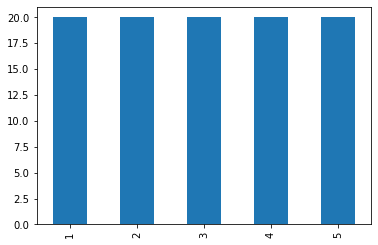

In [26]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

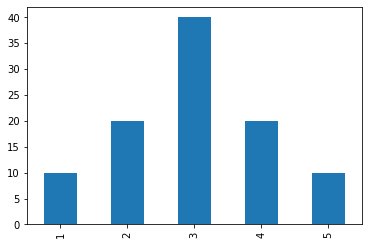

In [27]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

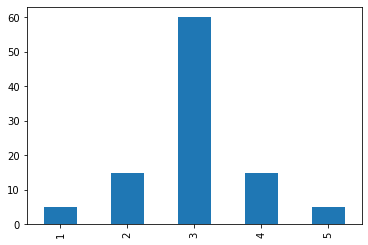

In [28]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [29]:
print("전혀 뾰족하지 않을 때 (평평할 때) 첨도:", kurtosis(x1))
print("조금 뾰족할 때 첨도:", kurtosis(x2))
print("매우 뾰족할 때 첨도:", kurtosis(x3))

전혀 뾰족하지 않을 때 (평평할 때) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매우 뾰족할 때 첨도: 0.8775510204081636


In [30]:
import os
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

with open('성인여성_키_데이터.txt', 'r') as f:
    data = f.read().split('\n')
    data = list(map(float, data))

In [31]:
data[:3]

[150.27, 142.94, 160.99]

In [32]:
# 정규성 검정
from scipy.stats import *
kstest(data, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [33]:
# 단일 표본 t 검정 수행
print(ttest_1samp(data,163))

Ttest_1sampResult(statistic=-2.979804412662668, pvalue=0.006510445335847954)


In [35]:
import pandas as pd
df1 = pd.read_csv('반별_점수_type1.csv', engine = 'python')
df1.head()

,반,점수
0,A,73
1,A,69
2,A,71
3,A,71
4,A,73


In [36]:
group_A = df1['점수'].loc[df1['반'] == 'A'].values
group_B = df1['점수'].loc[df1['반'] == 'B'].values

print(group_A)
print(group_B)

[73 69 71 71 73 67 73 69 62 74 68 66 70 82 70 65 76 73 58 81]
[63 56 73 61 55 77 75 65 61 55]


In [37]:
print(kstest(group_A, 'norm'))
print(kstest(group_B, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [38]:
# 등분산 검정
levene(group_A, group_B)

LeveneResult(statistic=2.033067087400979, pvalue=0.164964086222101)

In [39]:
import numpy as np
np.var(group_A, None, ddof = 1)

32.26052631578948

In [40]:
print(ttest_ind(group_A,group_B, equal_var = True))

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)


In [41]:
df2 = pd.read_csv("반별_점수_type2.csv", engine = "python")
df2.head()

,A반,B반
0,73,63.0
1,69,56.0
2,71,73.0
3,71,61.0
4,73,55.0


In [42]:
# 길이가 달라서 결측이 발생할 수 있으므로, 결측을 제거한 뒤 각 컬럼을 group_A와 group_B에 저장
group_A = df2['A반'].dropna().values
group_B = df2['B반'].dropna().values

In [43]:
group_A

array([73, 69, 71, 71, 73, 67, 73, 69, 62, 74, 68, 66, 70, 82, 70, 65, 76,
       73, 58, 81], dtype=int64)

In [44]:
group_B

array([63., 56., 73., 61., 55., 77., 75., 65., 61., 55.])

In [45]:
# A와 B간에는 차이가 존재함을 확인 
print(ttest_ind(group_A, group_B, equal_var = True)) 

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)


In [46]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

In [47]:
df = pd.read_csv('다이어트약_효과검증.csv')

In [48]:
df.columns

Index(['다이어트전(kg)', '다이어트후(kg)'], dtype='object')

In [49]:
before = df['다이어트전(kg)']
after = df['다이어트후(kg)']

In [50]:
# 정규성 검정
from scipy.stats import *
kstest(after - before, 'norm')

KstestResult(statistic=0.7424620196514834, pvalue=7.04108433205159e-29)

In [51]:
ttest_rel(before, after) # 확실한 양의 효가

Ttest_relResult(statistic=9.70596986565785, pvalue=5.370404098342324e-13)

In [52]:
import pandas as pd
import os
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

In [53]:
df = pd.read_csv('지점별_일별판매량.csv', engine = 'python')
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [54]:
# 데이터 분할 (결측이 포함되어 있을 수 있으므로 dropna를 사용)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

In [55]:
A

array([124, 147, 129, 123, 147, 149, 140, 142, 124, 166, 127, 130, 139,
       121, 149, 155, 140, 150, 137, 144, 136, 126, 150, 142, 149, 127,
       140, 138, 128, 117], dtype=int64)

([<matplotlib.axis.XTick at 0x18bf2850460>,
 [Text(0, 0, '지점 A'), Text(0, 0, '지점 B'), Text(0, 0, '지점 C')])

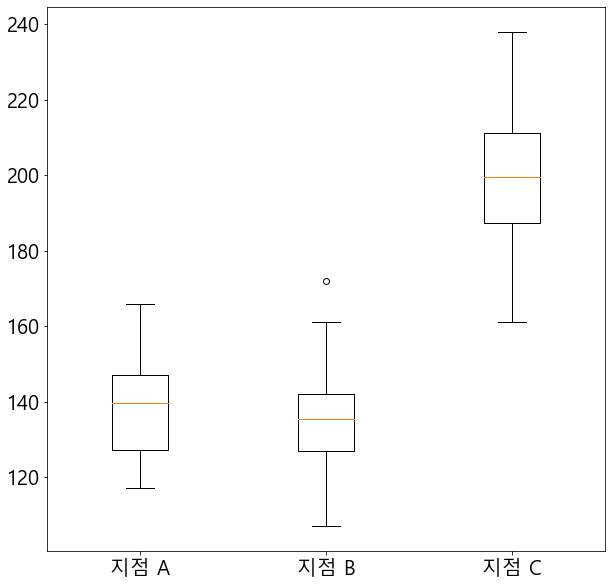

In [56]:
# 박스플롯으로 시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 10)
plt.boxplot([A,B,C])
plt.xticks([1,2,3],['지점 A','지점 B','지점 C'])

In [57]:
# 정규성 검정: 세 변수 모두 정규 분포를 띔을 확인
from scipy.stats import *
print(kstest(A, 'norm'))
print(kstest(B, 'norm'))
print(kstest(C, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [58]:
print(f_oneway(A,B,C))

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)


In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

In [2]:
df = pd.read_excel('일별_금은달러.xlsx')

In [3]:
df.head()

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0
3,2020.08.04,75873.57,26.01,1194.5
4,2020.08.03,75761.76,24.39,1195.7


In [4]:
df.sort_values(by='일자', inplace = True)

In [5]:
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


In [6]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10,8)

([<matplotlib.axis.XTick at 0x1b39e9c84f0>,
 <a list of 4 Text major ticklabel objects>)

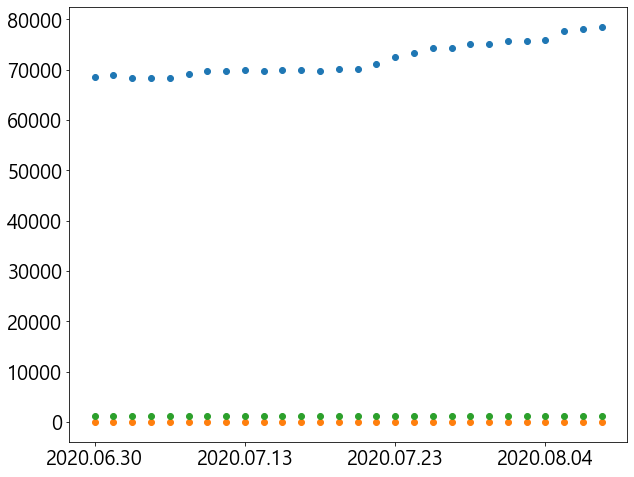

In [7]:
plt.scatter(df['일자'],df['금값'])
plt.scatter(df['일자'], df['은값'])
plt.scatter(df['일자'], df['달러 환율'])
plt.xticks(df['일자'].iloc[::8])

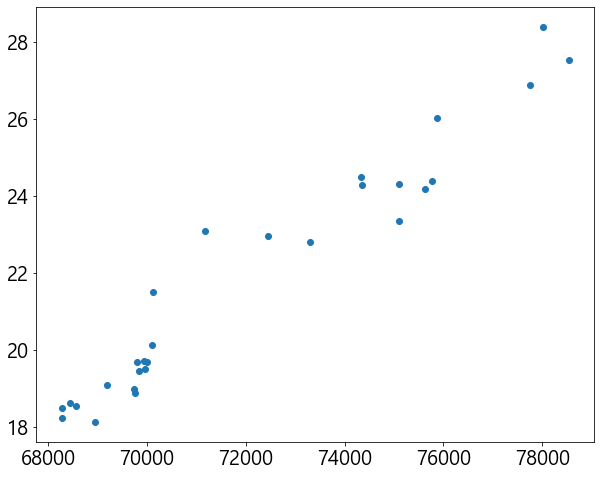

In [11]:
plt.scatter(df['금값'], df['은값'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B39EDBE400>,
      dtype=object)

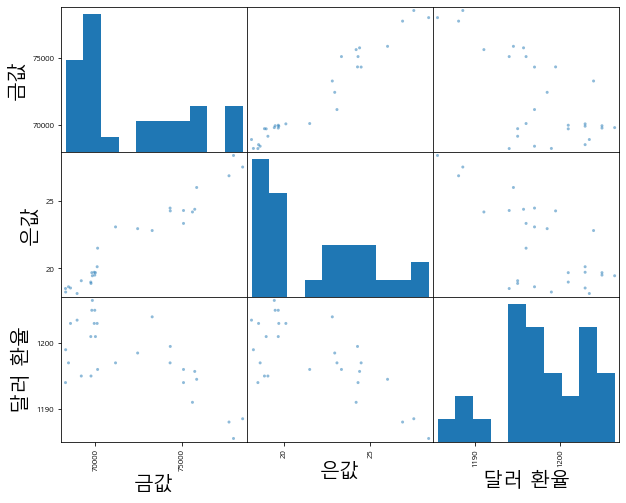

In [12]:
pd.plotting.scatter_matrix(df.drop('일자', axis = 1))

In [13]:
from scipy.stats import *
print(pearsonr(df['금값'],df['은값']))
print(pearsonr(df['금값'], df['달러 환율']))
print(pearsonr(df['은값'], df['달러 환율']))

(0.9718640116033497, 7.508878356556937e-18)
(-0.6793266264341936, 7.03332525845228e-05)
(-0.6954569556203559, 3.989042061957972e-05)


In [14]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = pearsonr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9718640116033497, p-value: 7.508878356556937e-18
금값 ~ 달러 환율: coef:-0.6793266264341936, p-value: 7.03332525845228e-05
은값 ~ 달러 환율: coef:-0.6954569556203559, p-value: 3.989042061957972e-05


In [15]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = spearmanr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9711235892228813, p-value: 1.0481280432981455e-17
금값 ~ 달러 환율: coef:-0.5039075855936102, p-value: 0.006257468267109452
은값 ~ 달러 환율: coef:-0.528106006718531, p-value: 0.003869997604824081


In [16]:
df.drop('일자', axis = 1).corr(method = 'pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [17]:
df.drop('일자', axis = 1).corr(method = 'spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000


In [19]:
df = pd.read_csv('성별에따른만족도.csv',engine = 'python')
df.head()

,만족도,성별
0,불만족,남성
1,보통,여성
2,불만족,여성
3,보통,남성
4,만족,여성


In [20]:
cross_table = pd.crosstab(df['만족도'],df['성별'])
cross_table

성별,남성,여성
만족도,,
만족,50,40
보통,40,30
불만족,10,30


In [21]:
obs = cross_table.values
obs

array([[50, 40],
       [40, 30],
       [10, 30]], dtype=int64)

In [22]:
from scipy.stats import *
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue)

0.001892528960792166


In [23]:
# 기대값
pd.DataFrame(expected, columns = cross_table.columns, index = cross_table.index)

성별,남성,여성
만족도,,
만족,45.0,45.0
보통,35.0,35.0
불만족,20.0,20.0


In [24]:
dof

2

In [25]:
statistics

12.53968253968254